# MVP Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class MVPmodel:
    def __init__(self, x0, params):
        self.x0 = x0
        self.x = x0
        self.D1, self.D2, self.Isc, self.Ip, self.Ieff, self.G, self.Gsc = x0

        self.tau1, self.tau2, self.C1, self.p2, self.S1,\
        self.gezi, self.egp0, self.Vg, self.taum, self.tausc = params

    def update_state(self, x_new):
        self.x = x_new
        self.D1, self.D2, self.Isc, self.Ip, self.Ieff, self.G, self.Gsc = x_new

    def f(self, u, d):
        dD1 = d - self.D1/self.taum
        dD2 = (self.D1 - self.D2)/taum
        dIsc = u/(self.tau1 * self.C1) - self.Isc/self.tau1
        dIp = (self.Isc - self.Ip)/self.tau2
        dIeff = -self.p2 * self.Ieff + self.p2 * self.S1 * self.Ip
        dG = - (self.gezi + self.Ieff) * self.G + self.egp0 + 1000 * self.D2 / (self.Vg * self.taum)
        dGsc = (self.G - self.Gsc) / self.tausc

        x_change = np.array([dD1, dD2, dIsc, dIp, dIeff, dG, dGsc])
        return x_change


    def euler_step(self, x_change, step_size):
        x_new = self.x + x_change * step_size
        self.update_state(x_new)


    def iterate(self, ts, us, ds):
        tdiff = np.diff(ts)
        state_func = []
        state_func.append(self.x)
        for step, u, d in zip(tdiff, us, ds):
            x_change = self.f(u, d)
            self.euler_step(x_change, step)
            state_func.append(self.x)
        return np.array(state_func)


In [2]:
tau1 = 49 # min
tau2 = 47 # min
C1 = 20.1 # dL/min
p2 = 0.0106 # 1/min
S1 = 0.0081 # dL/mU/min
gezi = 0.0022 # 1/min
egp0 = 1.33 # mg/dL/min
Vg = 253 # dL
taum = 47 # min
tausc = 5 # min

param = [tau1, tau2, C1, p2, S1, gezi, egp0, Vg, taum, tausc]


In [20]:
ok = MVPmodel(np.arange(7) * 0.01, param)

ts = np.arange(0, 24 * 60, 5)
u = np.ones(len(ts) - 1) * 25.04
d = np.zeros(len(ts) - 1)
states = ok.iterate(ts, u, d)

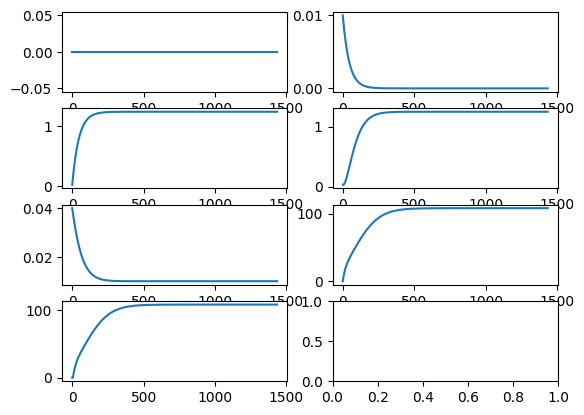

In [21]:
fig, ax = plt.subplots(4,2)
for i in range(7):
    ax[i//2, i%2].plot(ts,states[:,i])

plt.show()

108.2114981776497


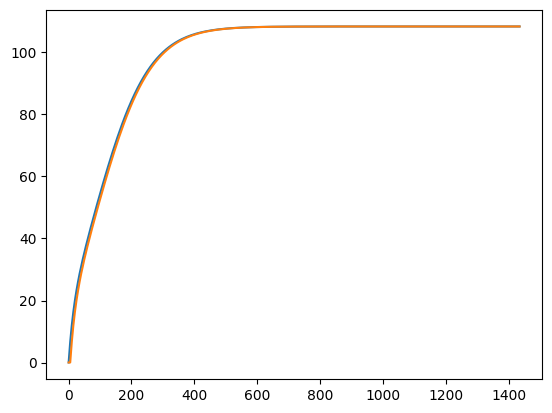

In [22]:
plt.plot(ts, states[:,5])
plt.plot(ts, states[:,6])